c:\Users\Gryffindor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy before PCA: 0.9814814814814815


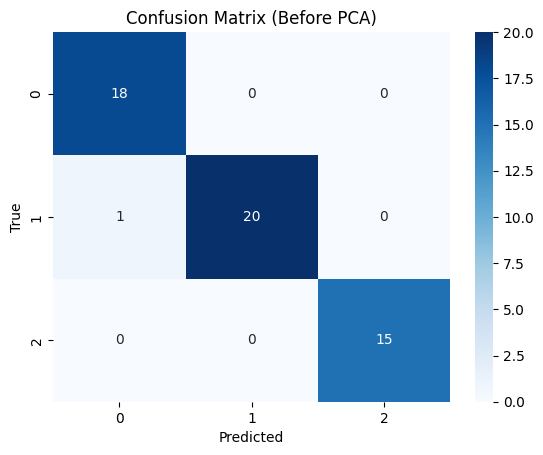

Accuracy after PCA: 0.9444444444444444


c:\Users\Gryffindor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


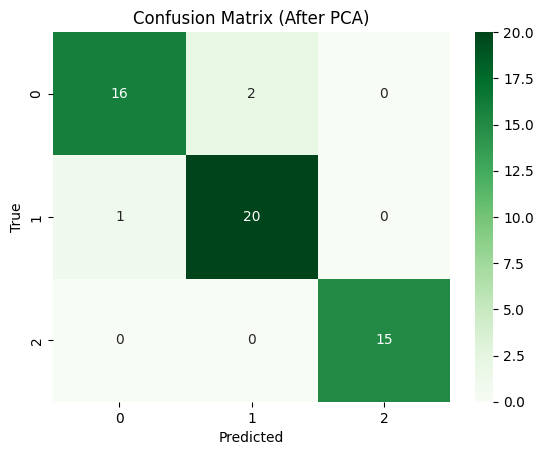

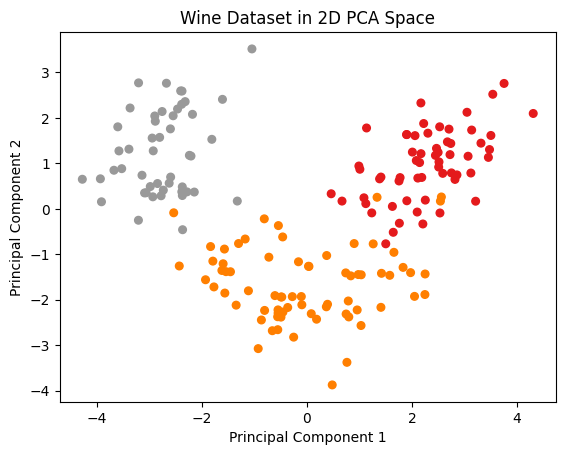

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
mlr.fit(X_train_scaled, y_train)
y_pred = mlr.predict(X_test_scaled)

print("Accuracy before PCA:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Before PCA)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

mlr_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
mlr_pca.fit(X_train_pca, y_train)
y_pred_pca = mlr_pca.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))

sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (After PCA)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

X_scaled_full = scaler.fit_transform(X)
X_pca2 = pca.fit_transform(X_scaled_full)
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='Set1', s=30)
plt.title("Wine Dataset in 2D PCA Space")
plt.xlabel("Principal Component 1"); plt.ylabel("Principal Component 2")
plt.show()


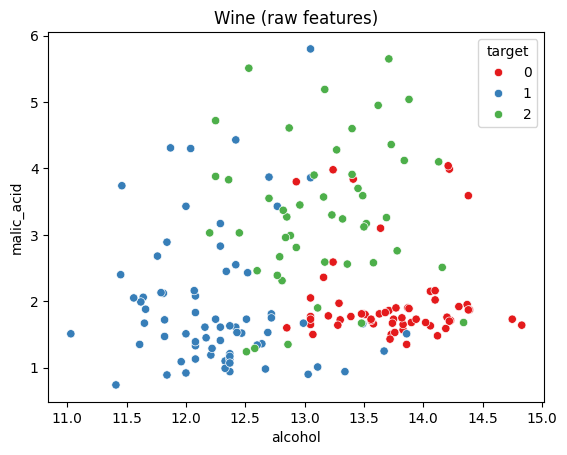

Accuracy before PCA: 0.981


c:\Users\Gryffindor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


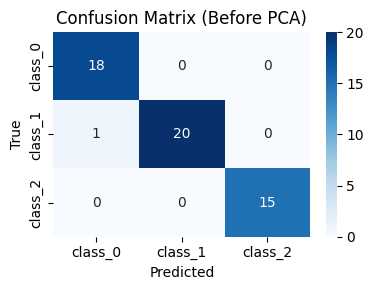

Explained variance (PC1, PC2): [0.36198848 0.1920749 ]


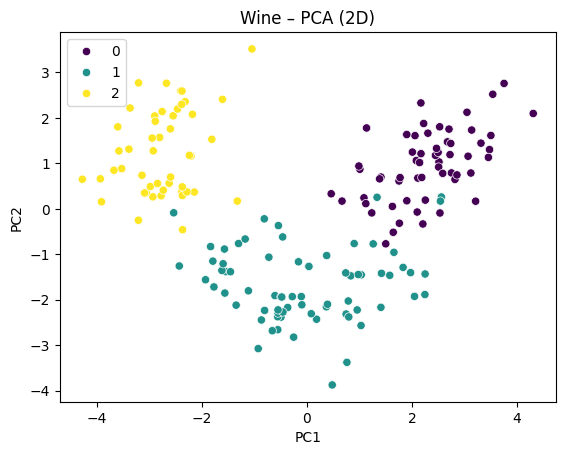

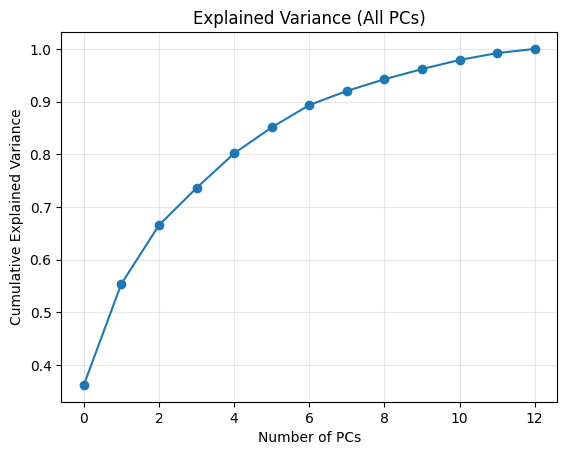

Accuracy after PCA (2D): 0.944


c:\Users\Gryffindor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


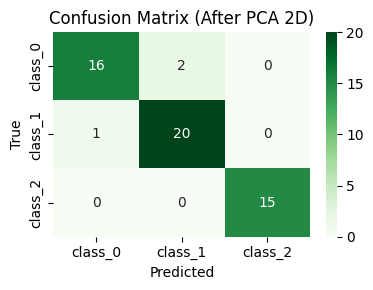

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# ---- Load data (use CSV if you have it; else fall back to sklearn) ----
# df = pd.read_csv("wine.csv")   # uncomment if wine.csv is available
# X = df.drop(columns=['target']).values
# y = df['target'].values
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# ---- Quick raw scatter (first two original features) ----
sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]],
                hue=df['target'], palette='Set1')
plt.title("Wine (raw features)"); plt.xlabel(feature_names[0]); plt.ylabel(feature_names[1])
plt.show()

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# ---- Multinomial Logistic Regression on ALL features ----
pipe_full = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000))
])
pipe_full.fit(X_train, y_train)
y_pred_full = pipe_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
cm_full = confusion_matrix(y_test, y_pred_full)

print(f"Accuracy before PCA: {acc_full:.3f}")

plt.figure(figsize=(4,3))
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (Before PCA)")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()

# ---- PCA (2 components) for visualization ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
print("Explained variance (PC1, PC2):", pca2.explained_variance_ratio_)

sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette='viridis')
plt.title("Wine – PCA (2D)"); plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Cumulative explained variance (all PCs)
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.ylabel("Cumulative Explained Variance"); plt.xlabel("Number of PCs")
plt.title("Explained Variance (All PCs)")
plt.grid(True, alpha=0.3); plt.show()

# ---- Retrain Logistic Regression on PCA-transformed (2D) ----
pipe_pca2 = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000))
])
pipe_pca2.fit(X_train, y_train)
y_pred_pca2 = pipe_pca2.predict(X_test)
acc_pca2 = accuracy_score(y_test, y_pred_pca2)
cm_pca2 = confusion_matrix(y_test, y_pred_pca2)

print(f"Accuracy after PCA (2D): {acc_pca2:.3f}")

plt.figure(figsize=(4,3))
sns.heatmap(cm_pca2, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (After PCA 2D)")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()
